# Machine Learning of Titanic
In this notebook, I will not only provide the basic steps to use machine learning knowledge to make predictions but also unite all important steps, define a interactive function, and make Titanic's machine learning more direct and clear.
Kaggle: https://www.kaggle.com/zhenyufan/machine-learning-of-titanic-new-beginner

## Import the Packages We Need

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Basic Operation about Dataframe - Prepare Data and Clean Data

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
print(train_df.head())
print(test_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [3]:
# For now, We jest explore training data first. Because when I am done with the training data, We will do the same things to testing data
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# First, we can find that the 'Cabin' variable has just 204 values, which is far less than other variables' values.
# So we need to remove it
train_df = train_df.drop(['Cabin'], axis = 1)
# What's more, the passengerID, Name and Ticket seem no use for further analysis. And we can remove them
train_df = train_df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1)

In [5]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Further Exploration of Training Data - Clean Data Deeperly
In this part, we will first fill the blank values of "Age" and "Embarker". And then we will transfer some variables, such as "Sex" and "Embarked", into dummy variables. Last, we will use different kinds of plots to see whether specific variable is related with the passengers' survival

### Fill All Null Values

In [6]:
# For "Age"
min_age = train_df['Age'].min()
max_age = train_df['Age'].max()
null_values_count = train_df['Age'].isnull().sum()
age_fill_values = np.random.randint(min_age, max_age, size = null_values_count)
train_df['Age'][np.isnan(train_df['Age'])] = age_fill_values

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:
# For "Embarked"
train_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [8]:
print(train_df['Embarked'][train_df['Embarked'] == 'S'].count()) # 644
print(train_df['Embarked'][train_df['Embarked'] == 'C'].count()) # 168
print(train_df['Embarked'][train_df['Embarked'] == 'Q'].count()) # 77 

644
168
77


In [9]:
# For "Embarked" variable, we can use 'S' to fill it because it has the largest frequency
train_df['Embarked'] = train_df['Embarked'].fillna('S')

In [10]:
train_df.count() # Make sure that all null values have been filled with some values

Survived    891
Pclass      891
Sex         891
Age         891
SibSp       891
Parch       891
Fare        891
Embarked    891
dtype: int64

### The Relationship Among Different Variables and Survival
When we find some variables are related to survival rate, we may keep those variables and sometime may transform them to a more suitable mode.

#### Correlation of Every Variables

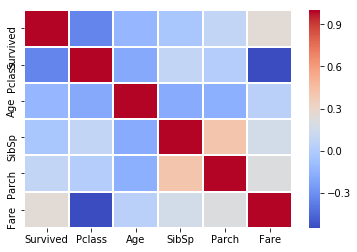

In [11]:
corr = train_df.corr()
sns.heatmap(corr, cmap = 'coolwarm', linewidth = 1, linecolor = 'white')
# From heatmap, we can see that there are some relations between survival and pclass, sex, age, sibsp, parch, fare and embark

#### Pclass and Survival

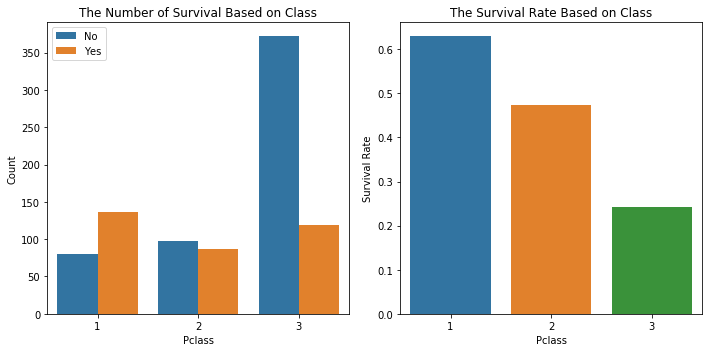

In [12]:
pclass_df = train_df[['Survived', 'Pclass']]
fig = plt.figure(figsize = (10,5))
axes0 = plt.subplot(1,2,1)
axes0 = sns.countplot(x = 'Pclass', hue = 'Survived', data = pclass_df)
axes0.set_title('The Number of Survival Based on Class')
axes0.set_ylabel('Count')
axes0.legend(['No', 'Yes'])

survival_pclass = pclass_df.groupby(['Pclass'], as_index = False).mean()
axes1 = plt.subplot(1,2,2)
axes1 = sns.barplot(x = 'Pclass', y = 'Survived', data = survival_pclass)  # sns barplot
axes1.set_title('The Survival Rate Based on Class')
axes1.set_ylabel('Survival Rate')

plt.tight_layout()
# It seems that the higher class passengers are, the more possible they can survive. 
# Therefore we need to produce two dummy variables to describe 'Pclass' according to Pclass values

In [13]:
train_df['High Class'] = np.where(train_df['Pclass'] == 1, 1, 0)
train_df['Median Class'] = np.where(train_df['Pclass'] == 2, 1, 0)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,High Class,Median Class
0,0,3,male,22.0,1,0,7.2500,S,0,0
1,1,1,female,38.0,1,0,71.2833,C,1,0
2,1,3,female,26.0,0,0,7.9250,S,0,0
3,1,1,female,35.0,1,0,53.1000,S,1,0
4,0,3,male,35.0,0,0,8.0500,S,0,0


#### Sex and Survival

Text(0,0.5,'Survival Rate')

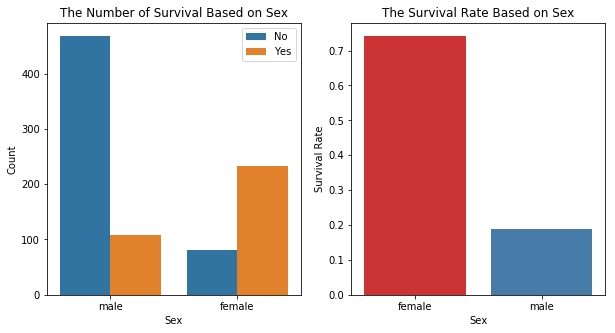

In [14]:
sex_df = train_df[['Survived', 'Sex']]
fig = plt.figure(figsize = (10,5))
axes0 = plt.subplot(1,2,1)
axes0 = sns.countplot(x = 'Sex', hue = 'Survived', data = sex_df)
axes0.set_title('The Number of Survival Based on Sex')
axes0.set_ylabel('Count')
axes0.legend(['No', 'Yes'])

survival_sex = sex_df.groupby(['Sex'], as_index = False).mean()
axes1 = plt.subplot(1,2,2)
axes1 = sns.barplot(x = 'Sex', y = 'Survived', data = survival_sex, palette = 'Set1') # sns factorplot
axes1.set_title('The Survival Rate Based on Sex')
axes1.set_ylabel('Survival Rate')
# It shows that female has more chances to survival
# We also need to transfer Sex to a dummy variable

In [15]:
train_df = train_df.replace({'Sex': {'male':0, 'female':1}})
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,High Class,Median Class
0,0,3,0,22.0,1,0,7.2500,S,0,0
1,1,1,1,38.0,1,0,71.2833,C,1,0
2,1,3,1,26.0,0,0,7.9250,S,0,0
3,1,1,1,35.0,1,0,53.1000,S,1,0
4,0,3,0,35.0,0,0,8.0500,S,0,0


#### Age and Survival

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0,0.5,'Survival Rate')

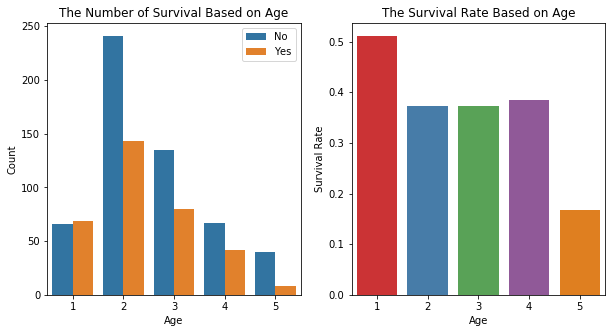

In [16]:
age_df = train_df[['Survived', 'Age']]
age_df['Age'] = pd.cut(age_df['Age'], bins = 5, labels = [1, 2, 3, 4, 5])
fig = plt.figure(figsize = (10,5))
axes0 = plt.subplot(1,2,1)
axes0 = sns.countplot(x = 'Age', hue = 'Survived', data = age_df)
axes0.set_title('The Number of Survival Based on Age')
axes0.set_ylabel('Count')
axes0.legend(['No', 'Yes'])

survival_age = age_df.groupby(['Age'], as_index = False).mean()
axes1 = plt.subplot(1,2,2)
axes1 = sns.barplot(x = 'Age', y = 'Survived', data = survival_age, palette = 'Set1') 
axes1.set_title('The Survival Rate Based on Age')
axes1.set_ylabel('Survival Rate')

# It indicates that age has influence on survival
# But we need to normalize Age values to make sure it belongs to [0,1]

In [17]:
age = train_df[['Age']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
age_scaled = min_max_scaler.fit_transform(age)
train_df['Age'] = pd.DataFrame(age_scaled)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,High Class,Median Class
0,0,3,0,0.2750,1,0,7.2500,S,0,0
1,1,1,1,0.4750,1,0,71.2833,C,1,0
2,1,3,1,0.3250,0,0,7.9250,S,0,0
3,1,1,1,0.4375,1,0,53.1000,S,1,0
4,0,3,0,0.4375,0,0,8.0500,S,0,0


#### SibSp and Survival

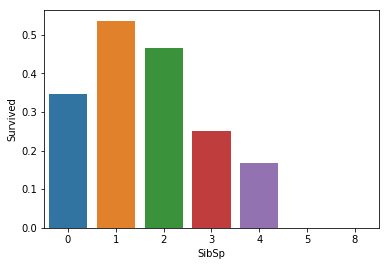

In [18]:
sibsp_df = train_df[['Survived', 'SibSp']]
survival_sibsp = sibsp_df.groupby(['SibSp'], as_index = False).mean()
sns.barplot(x = 'SibSp', y = 'Survived', data = survival_sibsp)
# Different "SibSps" have different survival rate

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0,0.5,'Survival Rate')

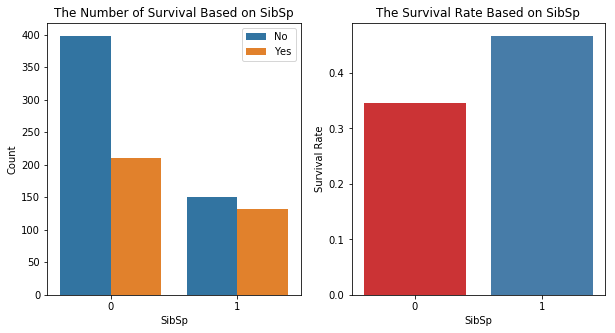

In [19]:
sibsp_df['SibSp'] = np.where(sibsp_df['SibSp'] > 0, 1, 0)
fig = plt.figure(figsize = (10,5))
axes0 = plt.subplot(1,2,1)
axes0 = sns.countplot(x = 'SibSp', hue = 'Survived', data = sibsp_df)
axes0.set_title('The Number of Survival Based on SibSp')
axes0.set_ylabel('Count')
axes0.legend(['No', 'Yes'])

survival_sibsp = sibsp_df.groupby(['SibSp'], as_index = False).mean()
axes1 = plt.subplot(1,2,2)
axes1 = sns.barplot(x = 'SibSp', y = 'Survived', data = survival_sibsp, palette = 'Set1') 
axes1.set_title('The Survival Rate Based on SibSp')
axes1.set_ylabel('Survival Rate')

In [20]:
# Transfer 'SibSp' to dummy variables in training dataframe
train_df['SibSp'] = np.where(train_df['SibSp'] > 0, 1, 0)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,High Class,Median Class
0,0,3,0,0.2750,1,0,7.2500,S,0,0
1,1,1,1,0.4750,1,0,71.2833,C,1,0
2,1,3,1,0.3250,0,0,7.9250,S,0,0
3,1,1,1,0.4375,1,0,53.1000,S,1,0
4,0,3,0,0.4375,0,0,8.0500,S,0,0


#### Parch and Survival

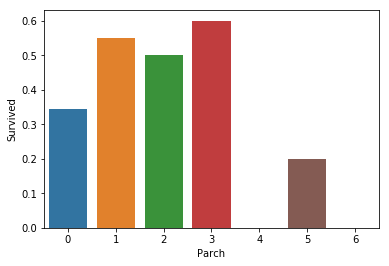

In [21]:
parch_df= train_df[['Survived', 'Parch']]
survival_parch = parch_df.groupby(['Parch'], as_index = False).mean()
sns.barplot(x = 'Parch', y = 'Survived', data = survival_parch)
# Different Parches have different survival rate

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0,0.5,'Survival Rate')

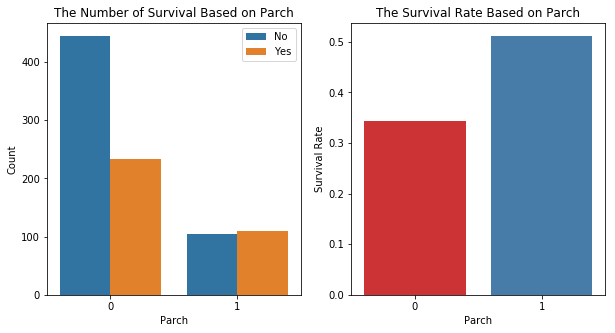

In [22]:
parch_df['Parch'] = np.where(parch_df['Parch'] > 0, 1, 0)
fig = plt.figure(figsize = (10,5))
axes0 = plt.subplot(1,2,1)
axes0 = sns.countplot(x = 'Parch', hue = 'Survived', data = parch_df)
axes0.set_title('The Number of Survival Based on Parch')
axes0.set_ylabel('Count')
axes0.legend(['No', 'Yes'])

survival_parch = parch_df.groupby(['Parch'], as_index = False).mean()
axes1 = plt.subplot(1,2,2)
axes1 = sns.barplot(x = 'Parch', y = 'Survived', data = survival_parch, palette = 'Set1') 
axes1.set_title('The Survival Rate Based on Parch')
axes1.set_ylabel('Survival Rate')

In [23]:
# Transfer 'Parch' to dummy variables in training dataframe
train_df['Parch'] = np.where(train_df['Parch'] > 0, 1, 0)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,High Class,Median Class
0,0,3,0,0.2750,1,0,7.2500,S,0,0
1,1,1,1,0.4750,1,0,71.2833,C,1,0
2,1,3,1,0.3250,0,0,7.9250,S,0,0
3,1,1,1,0.4375,1,0,53.1000,S,1,0
4,0,3,0,0.4375,0,0,8.0500,S,0,0


#### Fare and Survival

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0,0.5,'Survival Rate')

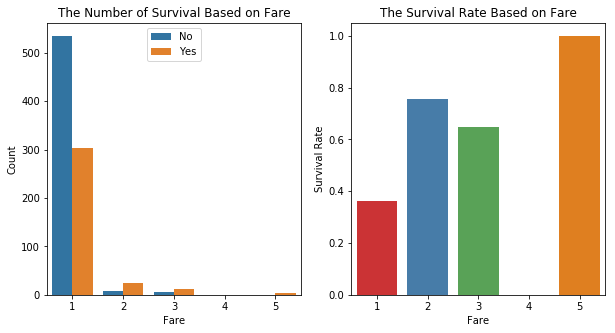

In [24]:
fare_df = train_df[['Survived', 'Fare']]
fare_df['Fare'] = pd.cut(fare_df['Fare'], bins = 5, labels = [1, 2, 3, 4, 5])
fig = plt.figure(figsize = (10,5))
axes0 = plt.subplot(1,2,1)
axes0 = sns.countplot(x = 'Fare', hue = 'Survived', data = fare_df)
axes0.set_title('The Number of Survival Based on Fare')
axes0.set_ylabel('Count')
axes0.legend(['No', 'Yes'])

survival_fare = fare_df.groupby(['Fare'], as_index = False).mean()
axes1 = plt.subplot(1,2,2)
axes1 = sns.barplot(x = 'Fare', y = 'Survived', data = survival_fare, palette = 'Set1') 
axes1.set_title('The Survival Rate Based on Fare')
axes1.set_ylabel('Survival Rate')
# By dividing fare into several parts, I just want to maker sure whether there is relationship between fare and survival
# Now we can see that this relationship does exist. And we need to normalize it

In [25]:
fare = train_df[['Fare']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
fare_scaled = min_max_scaler.fit_transform(fare)
train_df['Fare'] = pd.DataFrame(fare_scaled)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,High Class,Median Class
0,0,3,0,0.2750,1,0,0.014151,S,0,0
1,1,1,1,0.4750,1,0,0.139136,C,1,0
2,1,3,1,0.3250,0,0,0.015469,S,0,0
3,1,1,1,0.4375,1,0,0.103644,S,1,0
4,0,3,0,0.4375,0,0,0.015713,S,0,0


#### Embarked and Survival

Text(0,0.5,'Survival Rate')

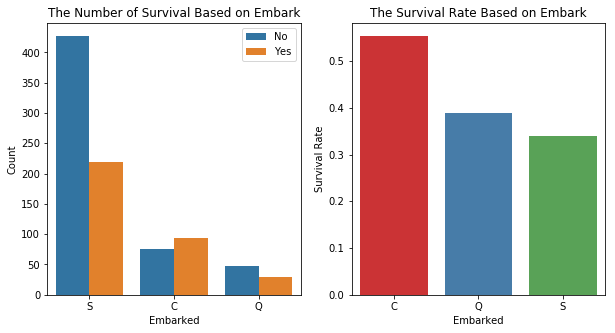

In [26]:
embarked_df = train_df[['Survived', 'Embarked']]
fig = plt.figure(figsize = (10,5))
axes0 = plt.subplot(1,2,1)
axes0 = sns.countplot(x = 'Embarked', hue = 'Survived', data = embarked_df)
axes0.set_title('The Number of Survival Based on Embark')
axes0.set_ylabel('Count')
axes0.legend(['No', 'Yes'])

survival_embarked = embarked_df.groupby(['Embarked'], as_index = False).mean()
axes1 = plt.subplot(1,2,2)
axes1 = sns.barplot(x = 'Embarked', y = 'Survived', data = survival_embarked, palette = 'Set1') 
axes1.set_title('The Survival Rate Based on Embark')
axes1.set_ylabel('Survival Rate')
# The "Embarked" variable can also affect survival

In [27]:
train_df['Embarked C'] = np.where(train_df['Embarked'] == 'C', 1, 0)
train_df['Embarked Q'] = np.where(train_df['Embarked'] == 'Q', 1, 0)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,High Class,Median Class,Embarked C,Embarked Q
0,0,3,0,0.2750,1,0,0.014151,S,0,0,0,0
1,1,1,1,0.4750,1,0,0.139136,C,1,0,1,0
2,1,3,1,0.3250,0,0,0.015469,S,0,0,0,0
3,1,1,1,0.4375,1,0,0.103644,S,1,0,0,0
4,0,3,0,0.4375,0,0,0.015713,S,0,0,0,0


### Final Training Dataframe
We have seen all variables in the training dataframe will influence passengers' survival rate. Therefore, we need include any of them to build up our models. However, before that, we have to delete some extral ones

In [28]:
final_train_df = train_df[['Survived', 'High Class', 'Median Class', 'Sex', 'Age', 'SibSp', 
                           'Parch', 'Fare', 'Embarked C', 'Embarked Q']]
final_train_df.head()

,Survived,High Class,Median Class,Sex,Age,SibSp,Parch,Fare,Embarked C,Embarked Q
0,0,0,0,0,0.2750,1,0,0.014151,0,0
1,1,1,0,1,0.4750,1,0,0.139136,1,0
2,1,0,0,1,0.3250,0,0,0.015469,0,0
3,1,1,0,1,0.4375,1,0,0.103644,0,0
4,0,0,0,0,0.4375,0,0,0.015713,0,0


## Build Prediction Model

In [29]:
independent_v_train = final_train_df[['High Class', 'Median Class', 'Sex', 'Age', 'SibSp', 
                                      'Parch', 'Fare', 'Embarked C', 'Embarked Q']]
dependent_v_train = final_train_df['Survived']

### Gaussian Model

In [30]:
gau = GaussianNB()
gau.fit(independent_v_train, dependent_v_train)
gau.score(independent_v_train, dependent_v_train)

0.7643097643097643

### SVC Model

In [31]:
svc = SVC()
svc.fit(independent_v_train, dependent_v_train)
svc.score(independent_v_train, dependent_v_train)

0.7867564534231201

### Perceptron Model

In [32]:
per = Perceptron()
per.fit(independent_v_train, dependent_v_train)
per.score(independent_v_train, dependent_v_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.7586980920314254

### Logistic Model

In [33]:
log = LogisticRegression()
log.fit(independent_v_train, dependent_v_train)
log.score(independent_v_train, dependent_v_train)

0.7934904601571269

### RandomForest Model

In [34]:
rf = RandomForestClassifier()
rf.fit(independent_v_train, dependent_v_train)
rf.score(independent_v_train, dependent_v_train)

0.9730639730639731

### DecisionTree Model

In [35]:
dt = DecisionTreeClassifier()
dt.fit(independent_v_train, dependent_v_train)
dt.score(independent_v_train, dependent_v_train)

0.9876543209876543

### K-Neighbors Model

In [36]:
kn = KNeighborsClassifier()
kn.fit(independent_v_train, dependent_v_train)
kn.score(independent_v_train, dependent_v_train)

0.8552188552188552

### SGD Model

In [37]:
sdg = SGDClassifier()
sdg.fit(independent_v_train, dependent_v_train)
sdg.score(independent_v_train, dependent_v_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.6835016835016835

### GradientBoosting Model

In [38]:
gb = GradientBoostingClassifier()
gb.fit(independent_v_train, dependent_v_train)
gb.score(independent_v_train, dependent_v_train)

0.8922558922558923

In [39]:
result_dict = {'Model' :['Gaussian', 'SVC', 'Perceptron', 'Logistic', 'RandomForest', 
                         'DecisionTree', 'K-Neibours', 'SGD', 'GradientBoosting'], 
              'Score': [gau.score(independent_v_train, dependent_v_train), svc.score(independent_v_train, dependent_v_train),
                       per.score(independent_v_train, dependent_v_train), log.score(independent_v_train, dependent_v_train),
                       rf.score(independent_v_train, dependent_v_train), dt.score(independent_v_train, dependent_v_train),
                       kn.score(independent_v_train, dependent_v_train), sdg.score(independent_v_train, dependent_v_train), 
                       gb.score(independent_v_train, dependent_v_train)]}
pd.DataFrame(result_dict)

,Model,Score
0,Gaussian,0.764310
1,SVC,0.786756
2,Perceptron,0.758698
3,Logistic,0.793490
4,RandomForest,0.973064
5,DecisionTree,0.987654
6,K-Neibours,0.855219
7,SGD,0.683502
8,GradientBoosting,0.892256


## Make Predictions

### Clean the Testing Data

In [40]:
test_df.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

In [41]:
# Remove unrelated variables
test_df = test_df.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis = 1)
# Transform Pclass and Sex variable
test_df['High Class'] = np.where(test_df['Pclass'] == 1, 1, 0)
test_df['Median Class'] = np.where(test_df['Pclass'] == 2, 1, 0)
test_df = test_df.replace({'Sex': {'male':0, 'female':1}})
# Fill NAs in Age and normalizing values
min_age = test_df['Age'].min()
max_age = test_df['Age'].max()
null_values_count = test_df['Age'].isnull().sum()
age_fill_values = np.random.randint(min_age, max_age, size = null_values_count)
test_df['Age'][np.isnan(test_df['Age'])] = age_fill_values
age = test_df[['Age']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
age_scaled = min_max_scaler.fit_transform(age)
test_df['Age'] = pd.DataFrame(age_scaled)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [42]:
# Transform SibSp and Parch variables
test_df['SibSp'] = np.where(test_df['SibSp'] > 0, 1, 0)
test_df['Parch'] = np.where(test_df['Parch'] > 0, 1, 0) 
# Fill NA in Fare and Normalizing values
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].mean())
fare = train_df[['Fare']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
fare_scaled = min_max_scaler.fit_transform(fare)
test_df['Fare'] = pd.DataFrame(fare_scaled)
# Fill NA in Embarked and transform values
print(test_df['Embarked'][test_df['Embarked'] == 'S'].count()) # 270
print(test_df['Embarked'][test_df['Embarked'] == 'C'].count()) # 102
print(test_df['Embarked'][test_df['Embarked'] == 'Q'].count()) # 46
test_df['Embarked'] = test_df['Embarked'].fillna('S')
test_df['Embarked C'] = np.where(test_df['Embarked'] == 'C', 1, 0)
test_df['Embarked Q'] = np.where(test_df['Embarked'] == 'Q', 1, 0)
test_df.count()

270
102
46


Pclass          418
Sex             418
Age             418
SibSp           418
Parch           418
Fare            418
Embarked        418
High Class      418
Median Class    418
Embarked C      418
Embarked Q      418
dtype: int64

In [43]:
final_test_df = test_df[['High Class', 'Median Class', 'Sex', 'Age', 'SibSp', 
                           'Parch', 'Fare', 'Embarked C', 'Embarked Q']]
final_test_df.head()

,High Class,Median Class,Sex,Age,SibSp,Parch,Fare,Embarked C,Embarked Q
0,0,0,0,0.452723,0,0,0.014151,0,1
1,0,0,1,0.617566,1,0,0.139136,0,0
2,0,1,0,0.815377,0,0,0.015469,0,1
3,0,0,0,0.353818,0,0,0.103644,0,0
4,0,0,1,0.287881,1,1,0.015713,0,0


### Predict

In [44]:
independent_v_test = final_test_df
dependent_v_test_predict = gb.predict(independent_v_test)
survival_df = pd.DataFrame(dependent_v_test_predict)
test_get_id = pd.read_csv('test.csv')
prediction_df = pd.DataFrame(test_get_id['PassengerId'])
prediction_df['Survived'] = survival_df

In [45]:
prediction_df.to_csv('Prediction of Titanic.csv', index=False)